# Paket Prabayar Manakah yang Lebih Baik?


**Deskripsi Project**

Anda bekerja sebagai seorang analis di perusahaan operator telekomunikasi bernama Megaline. Perusahaan tersebut menawarkan kliennya dua jenis paket prabayar, yaitu paket Surf dan paket Ultimate. Departemen periklanan ingin mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan, sehingga mereka bisa membuat anggaran iklan yang sesuai.

Analisis ini dilakukan untuk melakukan analisis awal terhadap dua jenis paket prabayar yang ditawarkan oleh perusahaan telekomunikasi Megaline, yaitu paket Surf dan paket Ultimate. Analisis ini bertujuan untuk mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan berdasarkan data sampel klien yang berjumlah 500 orang.

## Tujuan

Tujuan dari proyek ini adalah untuk melakukan analisis data para pengguna paket prabayar dan untuk mendapatkan jawaban dari pertanyaan berikut:

1. Menganalisa perilaku konsumen yang menggunakan paket prabayar Surf dan Ultimate dengan sampel klien berjumlah 500 orang
2. Menguji dua hipotesis statistik:
    - Apakah Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda?
    - Apakah Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain?

## Tahapan

Tahapan dari proyek ini memiliki lima tahapan diantaranya:
1. Pra-pemrosesan data
2. Data Preparation
3. Data Analyst
4. Menguji Hipotesis Statistik
5. Melakukan Kesimpulan

Dataset yang digunakan pada proyek diantaranya:

- `/datasets/megaline_calls.csv Unduh dataset`
- `/datasets/megaline_internet.csv Unduh dataset`
- `/datasets/megaline_messages.csv Unduh dataset`
- `/datasets/megaline_plans.csv Unduh dataset`
- `/datasets/megaline_users.csv Unduh dataset`

# Pra-Pemrosesan Data

Tahapan Pra-pemrosesan data dilakukan untuk mengetahui informasi terkait dataset yang akan dilakukan analisa, apakah ada data yang tidak sesuai, data mana yang akan digunakan, serta penanganan apa yang harus dilakukan untuk membuat data menjadi lebih baik.

## Inisialisasi

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from scipy import stats as st
import seaborn as sns

## Memuat Data

In [2]:
# Muat file data ke dalam DataFrame yang berbeda

calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
users = pd.read_csv('/datasets/megaline_users.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')


## Gambaran Umum Data

### Call Data

In [3]:
# Menampilkan informasi data Calls

calls.info()
calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


**Deskripsi Tabel calls (data panggilan)**
- `id` — ID panggilan unik
- `call_date` — tanggal panggilan
- `duration` — durasi panggilan (dalam menit)
- `user_id` — ID pengguna yang melakukan panggilan


**Masalah dan Penanganannya**

- Tidak ada nilai yang hilang dalam tabel ini
- tipe data `call_date` perlu diubah menjadi datetime
- Nilai `duration` perlu dibulatkan ke bilangan bulat terdekat
- Jumlah panggilan dan durasi perlu diagregasi berdasarkan user_id dan bulan.

**Meperbaiki data**

In [4]:
# Konversi 'call_date' menjadi tipe data datetime
calls['call_date'] = pd.to_datetime(calls['call_date'], format ='%Y-%m-%d')

# Membuat kolom baru yang menunjukkan bulan panggilan dilakukan
calls['month'] = calls['call_date'].dt.month

# Membulatkan durasi dan mengonversinya menjadi bilangan bulat
calls['duration'] = calls['duration'].apply(np.ceil).astype(int)

**Memperkaya Kualitas Data**

In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
 4   month      137735 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.3+ MB


### Internet Data

In [6]:
# Menampilkan informasi data Internet

internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


**Deskripsi Tabel internet:**
- `id` — ID nilai unik
- `mb_used` — volume data yang dihabiskan selama sesi (dalam megabyte)
- `session_date` — tanggal sesi web
- `user_id` — ID pengguna

**Masalah dan Penanganannya**
- Tidak ada nilai yang hilang dalam tabel ini
- tipe data `session_date` perlu diubah menjadi datetime
- Jumlah sesi dan data yang digunakan perlu diagregasi berdasarkan `user_id` dan bulannya.
- Nilai gabungan` mb_used` perlu diubah menjadi nilai gigabyte dan dibulatkan ke bilangan bulat terdekat
  dilakukan pada saat tahap agregasi

**Memperbaiki Data**

In [7]:
# Konversi 'session_date' menjadi tipe data datetime
internet['session_date'] = pd.to_datetime(internet['session_date'], format ='%Y-%m-%d')

# Membuat kolom baru yang menunjukkan bulan panggilan dilakukan
internet['month'] = internet['session_date'].dt.month


**Memperkaya Kualitas Data**

In [8]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB


### Messages Data

In [9]:
# Menampilkan informasi data Messages

messages.info()
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


**Deskripsi Tabel messages (data SMS):**
- `id` — ID SMS unik
- `message_date` — tanggal SMS dikirim
- `user_id` — ID pengguna yang mengirim SMS

**Masalah dan Penanganannya**
- Tidak ada nilai yang hilang dalam tabel ini
- tipe data `message_date` perlu diubah menjadi `datetime`
- Jumlah pesan perlu diagregasi berdasarkan `user_id` dan bulan.

**Memperbaiki Kualitas Data**

In [10]:
# Konversi 'message_date' menjadi tipe data datetime
messages['message_date'] = pd.to_datetime(messages['message_date'], format ='%Y-%m-%d')

# Membuat kolom baru yang menunjukkan bulan panggilan dilakukan
messages['month'] = messages['message_date'].dt.month

**Memperkaya Kualiatas Data**

In [11]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


### User Data

In [12]:
# Menampilkan informasi data User

users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


**Deskripsi Tabel users (data pengguna):**
- `user_id` — ID pengguna
- `first_name` — nama depan pengguna
- `last_name` — nama belakang pengguna
- `age` — usia pengguna (tahun)
- `reg_date` — tanggal mulai berlangganan (dd, mm, yy)
- `churn_dat`e — tanggal pengguna berhenti menggunakan layanan (jika nilainya hilang atau tidak ada, berarti paket layanan sedang digunakan saat data ini dibuat)
- `city` — kota tempat tinggal pengguna
- `plan` — nama paket telepon

**Masalah dan Penanganannya**
- Tidak ada nilai yang hilang dalam tabel ini
- Informasi negara bagian akan diekstrak dari kota
- Kolom yang tidak diperlukan akan dihapus.
- Tabel ini akan digunakan sebagai referensi utama untuk proses penggabungan

**Memperbaiki Kualitas Data**

In [13]:
# Buat kolom baru 'state' dari kolom 'city'
users['state'] = users['city'].str[-6:].str[:2]

# menghapus kolom yang tidak diperlukan
users = users.drop(['first_name', 'last_name','age','city','reg_date','churn_date'], axis = 1)

# Set user_id sebagai index
users = users.set_index('user_id')

**Memperkaya Kualitas Data**

In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1000 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   plan    500 non-null    object
 1   state   500 non-null    object
dtypes: object(2)
memory usage: 11.7+ KB


### Plans Data

In [15]:
# Menampilkan informasi data Plans

plans.info()
plans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


**Deskripsi Tabel paket prabayar:**

- `plan_name` — nama paket telepon
- `usd_monthly_fee` — biaya bulanan dalam dolar AS
- `minutes_included` — alokasi menit panggilan bulanan
- `messages_included` — alokasi SMS bulanan
- `mb_per_month_included` — alokasi volume data bulanan (dalam megabyte)
- `usd_per_minute` — harga per menit jika sudah melebihi batas alokasi paket (misalnya, jika paket memiliki alokasi 100 menit maka penggunaan mulai dari menit ke-101 akan dikenakan biaya)
- `usd_per_message` — harga per SMS jika sudah melebihi batas alokasi paket
- `usd_per_gb` — harga per gigabyte tambahan data jika sudah melebihi batas alokasi paket (1 GB = 1024 megabyte)

**Masalah dan Penanganannya**
- Tidak ada nilai yang hilang dalam tabel ini
- Tabel ini tidak akan digunakan untuk langkah lebih lanjut selain untuk referensi

## Kesimpulan Pra-Pemprosesan

Kesimpulan dari Pra-pemrosesan data adalah:
 
- kolom tanggal yang memiliki tipe data yang salah
- kolom duration dari dataset Call harus dilakukan pembulatan ke bilangan bulat terdekat karena data tersebut akan dilakukan perhitungan ditahap selanjutnya
- data perlu dilakukan agregasi berdasarkan user_id dan bulan untuk mengetahui penggunaan antara paket Surf dan Ultimate
- melakukan penghapusan kolom yang tidak diperlukan untuk analisa data

Dengan menangani masalah-masalah ini dan juga perbaikan dari data yang bermasalah, data sekarang telah siap untuk diolah lebih lanjut. Setelah penggabungan dan agregasi data, analisis perilaku pengguna dan penghasilan dari paket prabayar Surf dan Ultimate dapat dilakukan. Hasil analisis ini akan memberikan wawasan yang diperlukan untuk membantu perusahaan Megaline membuat keputusan strategis terkait pemasaran dan peningkatan pendapatan.

# Data Preparation

Setalah melalukan Pra-pemrosesan data dan mendapatkan wawasan tentang data yang harus dilakukan, pada proses data preparatioon ini data akan disiap kan untuk dilakukan analisa lebih lanjut yaitu data akan dilakukan agregasi serta menghitung biaya penggunaan paket prabayar yang berlebihan

## Mempelajari Syarat dan Kondisi Terkait Paket Prabayar

Mempelajari syarat dan kodisi terkait paket prabayar sangat penting untuk memahami cara kerja paket, bagaimana pengguna dikenakan biaya berdasarkan paket prabayar yang mereka pilih sesuai dengan ketentuan yang berlaku

In [16]:
# Tampilkan persyaratan paket prabayar dan pastikan Anda memahaminya

# Transform mb per month menjadi gb per month
plans['gb_per_month_included'] = plans['mb_per_month_included'] / 1024

# Hapus kolom yang tidak dibutuhkan
plans.drop('mb_per_month_included', axis=1, inplace=True)
plans

,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_per_month_included
0,50,500,20,10,0.03,0.03,surf,15.0
1,1000,3000,70,7,0.01,0.01,ultimate,30.0


**Deskripsi Tabel plans (data paket telepon):**

- `plan_name` — nama paket telepon
- `usd_monthly_fee` — biaya bulanan dalam dolar AS
- `minutes_included` — alokasi menit panggilan bulanan
- `messages_included` — alokasi SMS bulanan
- `mb_per_month_included` — alokasi volume data bulanan (dalam megabyte)
- `usd_per_minute` — harga per menit jika sudah melebihi batas alokasi paket (misalnya, jika paket memiliki alokasi 100 menit maka penggunaan mulai dari menit ke-101 akan dikenakan biaya)
- `usd_per_message` — harga per SMS jika sudah melebihi batas alokasi paket
- `usd_per_gb` — harga per gigabyte tambahan data jika sudah melebihi batas alokasi paket (1 GB = 1024 megabyte)

**Ketentuan Paket setelah melebihi batas penggunaan**

Untuk paket Surf, Setelah melebihi batas paket, biaya berikut ini akan berlaku:
- 1 menit: 3 sen
- 1 SMS: 3 sen
- 1 GB data: $10

Untuk paket Ultimate, Setelah melebihi batas paket, biaya berikut akan berlaku:
- 1 menit: 1 sen
- 1 SMS: 1 sen
- 1 GB data: $7

## Mengagregasi Data per Pengguna

Pada tahap ini kita akan melakukan agregasi data setiap pengguna per periode untuk memudahkan analisis lebih lanjut, serta melakukan perhitungan pengguna yang melebihi paket yang sudah ditentukan 


**Melakukan Agregat data Jumlah panggilan**

In [17]:
# Hitung jumlah panggilan dan jumlah menit yang dilakukan oleh setiap pengguna per bulan. Simpan hasilnya.

calls = (calls.groupby(['user_id','month'])
         .agg({'id':'count','duration':'sum'})
         .rename(columns={'id':'calls'}))


calls.head()

calls  duration
user_id month                 
1000    12        16       124
1001    8         27       182
        9         49       315
        10        65       393
        11        64       426

**Melakukan Agregat data Jumlah SMS**

In [18]:
# Hitung jumlah SMS yang dikirim oleh setiap pengguna per bulan. Simpan hasilnya.

messages = (messages.groupby(['user_id','month'])
         .agg({'id':'count'})
         .rename(columns={'id':'messages'}))

messages.head()

messages
user_id month          
1000    12           11
1001    8            30
        9            44
        10           53
        11           36

**Melakukan Agregat data volume trafik internet**

In [19]:
# Hitung volume traffic internet yang digunakan oleh setiap pengguna per bulan. Simpan hasilnya.


# Agregasi jumlah sesi dan megabyte yang digunakan berdasarkan user_id dan bulan
internet = (internet.groupby(['user_id','month'])
         .agg({'id':'count','mb_used':'sum'})
         .rename(columns={'id':'session','mb_used':'mb_used'}))

# Konversi megabyte menjadi gigabyte, dibulatkan ke atas, dan konversi menjadi integer
internet['data'] = (internet['mb_used']/1024).apply(np.ceil).astype(int)

# Menghapus kolom mb_used
internet = internet.drop('mb_used', axis = 1)

internet.head()

session  data
user_id month               
1000    12           5     2
1001    8           25     7
        9           53    14
        10          56    22
        11          51    19

**Menggabungkan Seluruh data dari hasil agregasi**

In [20]:
# Gabungkan data panggilan, menit, SMS, dan internet berdasarkan user_id dan month (bulan)

temp_1 = pd.merge(users,calls,how='outer', left_index=True, right_index=True)
temp_2 = pd.merge(temp_1,messages,how='outer',left_index=True,right_index=True)
df = pd.merge(temp_2,internet,how='outer',left_index=True,right_index=True)

df.head()


plan state  calls  duration  messages  session  data
user_id month                                                          
1000    12     ultimate    GA   16.0     124.0      11.0      5.0   2.0
1001    8          surf    WA   27.0     182.0      30.0     25.0   7.0
        9          surf    WA   49.0     315.0      44.0     53.0  14.0
        10         surf    WA   65.0     393.0      53.0     56.0  22.0
        11         surf    WA   64.0     426.0      36.0     51.0  19.0

**Menghitung Kelebihan pemakaian user**

Melakukan analisa untuk mengetahui user mana yang mempunyai kelebihan layanan paket prabayar

In [21]:
def temporary_column(source_col, limit1, limit2, dataframe=df, plan_col='plan',  plan1='surf', plan2='ultimate'):
    
    # membuat kondisi berdasarkan batasan yang diberikan, 
    # kondisi tersebut mencakup 'surf' dengan nilai di atas dan di bawah limit1
    # serta kondisi 'ultimate' dengan nilai di atas dan di bawah limit2
    conditions = [
        (dataframe[plan_col] == plan1) & (dataframe[source_col] > limit1),
        (dataframe[plan_col] == plan1) & (dataframe[source_col] <= limit1),
        (dataframe[plan_col] == plan2) & (dataframe[source_col] > limit2),
        (dataframe[plan_col] == plan2) & (dataframe[source_col] <= limit2),
    ]
    
    # membuat nilai yang akan diassign untuk setiap kondisi.
    values = [dataframe[source_col]-limit1, 0, dataframe[source_col]-limit2, 0]
    
    # membuat kolom temporary
    temp_column = 'exceeded_' + source_col
    dataframe[temp_column] = np.select(conditions,values)
    
    return dataframe

In [22]:
# Kelebihan durasi panggilan
temporary_column('duration', 500, 3000)
# Kelebihan pesan
temporary_column('messages', 50, 1000)
# Kelebihan penggunaan data internet
temporary_column('data', 15, 30)

df.head()

plan state  calls  duration  messages  session  data  \
user_id month                                                             
1000    12     ultimate    GA   16.0     124.0      11.0      5.0   2.0   
1001    8          surf    WA   27.0     182.0      30.0     25.0   7.0   
        9          surf    WA   49.0     315.0      44.0     53.0  14.0   
        10         surf    WA   65.0     393.0      53.0     56.0  22.0   
        11         surf    WA   64.0     426.0      36.0     51.0  19.0   

               exceeded_duration  exceeded_messages  exceeded_data  
user_id month                                                       
1000    12                   0.0                0.0            0.0  
1001    8                    0.0                0.0            0.0  
        9                    0.0                0.0            0.0  
        10                   0.0                3.0            7.0  
        11                   0.0                0.0            4.0

setelah ditemukan user mana saja yang mempunyai kelebihan penggunaan paket prabayar, lalu dilakukan perhitungan dari data paket awal dijumlahkan dengan kelebihan pemakaian paket prabayar dengan kreteria berikut

**Ketentuan Paket setelah melebihi batas penggunaan**

Untuk paket Surf, Setelah melebihi batas paket, biaya berikut ini akan berlaku:
- 1 menit: 3 sen
- 1 SMS: 3 sen
- 1 GB data: $10

Untuk paket Ultimate, Setelah melebihi batas paket, biaya berikut akan berlaku:
- 1 menit: 1 sen
- 1 SMS: 1 sen
- 1 GB data: $7

In [23]:
# Hitung pendapatan bulanan untuk setiap pengguna

# membuat list kondisi
conditions = [
    df['plan'] == 'surf',   
    df['plan'] == 'ultimate',
    ]

# membuat list nilai untuk paket `surf` dan `ultimate`
values = [
    (20 + df['exceeded_duration']*0.03 + df['exceeded_messages']*0.03 + df['exceeded_data']*10),
    (70 + df['exceeded_duration']*0.01 + df['exceeded_messages']*0.01 + df['exceeded_data']*7)
]

# membuat kolom baru untuk `monthly_income`
df['monthly_income'] = np.select(conditions, values)


In [24]:
# menghapus kolom temporary
df = df.drop(['exceeded_duration','exceeded_messages','exceeded_data'],axis=1)

df.head()

plan state  calls  duration  messages  session  data  \
user_id month                                                             
1000    12     ultimate    GA   16.0     124.0      11.0      5.0   2.0   
1001    8          surf    WA   27.0     182.0      30.0     25.0   7.0   
        9          surf    WA   49.0     315.0      44.0     53.0  14.0   
        10         surf    WA   65.0     393.0      53.0     56.0  22.0   
        11         surf    WA   64.0     426.0      36.0     51.0  19.0   

               monthly_income  
user_id month                  
1000    12              70.00  
1001    8               20.00  
        9               20.00  
        10              90.09  
        11              60.00

## Kesimpulan Agregasi Data per Pengguan

Hasil dari Agregasi data dapat diketahui user menggukanan layanan SMS, Panggilan, Internet pada setiap bulannya. yang mana dari hasil agregasi tersebut data diolah kembali untuk mengetahui user yang menggukan layanan paket prabayar yang melebihi paket yang sudah ditentukan. kemudian dari data tersebut dilakukan perhitungan pendapatan perbulan dari setiap user. kemudian hasil dari data agregasi ini akan dilakukan analisa untuk membandingkan antara paket prabayar Surf dan Ultimate manakah yang lebih menguntungkan bagi perusaha

**Kolom yang akan dilakukan analisa**

- `user_id` - User id
- `month` - bulan berlangganan
- `plan` - paket prabayar yang digunakan
- `state` - wilayah paket prabayar
- `calls` - jumlah panggilan yang dilakukan oleh pengguna
- `duration` - jumlah durasi panggilan
- `messages` - jumlah sms yang dikirim oleh pengguna
- `session` - jumlah sesi web yang dibuat oleh pengguna
- `data` - jumlah data gigabyte yang dibuat oleh pengguna
- `monthly_income` - total tagihan yang diterima oleh pengguna setiap bulannya

# Data Analyst

Tujuan dari Data Analyst ini adalah mempelajari perilaku pengguana paket prabayar Surf dan Ultimate setiap bulannya, kita akan membuat grafik perbandingan untuk mempermudah memahami pemahaman dataset paket prabayar Surf dan Ultimate. melakukan perhitungan untuk setiap panggilan, SMS, internet, dan pendapatannya pada setiap bulan

## Panggilan

**Melakukan perbandingan antara layanan telepon paket Surf dan Ultimate**

[Text(0.5, 0, 'Bulan'), Text(0, 0.5, 'Rata-rata durasi panggilan')]

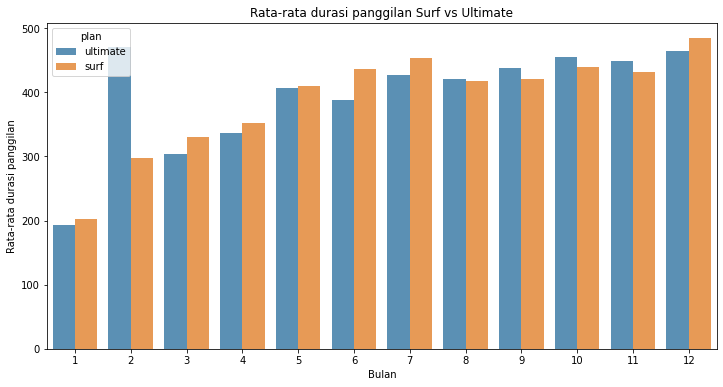

In [25]:
# Bandingkan durasi rata-rata panggilan setiap paket per bulannya. Buatlah sebuah diagram batang untuk memvisualisasikannya.

plt.figure(figsize=(12, 6))

a = sns.barplot(data=df, x=df.index.get_level_values(1), y="duration", hue='plan', alpha=0.8, ci=None)
a.set_title('Rata-rata durasi panggilan Surf vs Ultimate')
a.set(xlabel='Bulan',ylabel='Rata-rata durasi panggilan')

[Text(0.5, 0, 'Bulan'), Text(0, 0.5, 'Durasi Panggilan (menit)')]

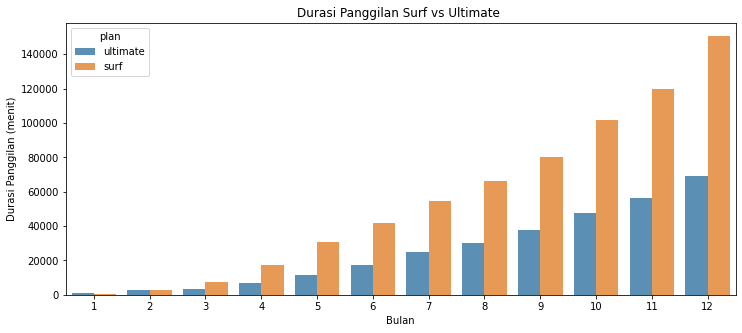

In [26]:
# Bandingkan jumlah menit yang dibutuhkan pengguna tiap paket per bulannya. Buatlah sebuah histogram.

plt.figure(figsize=(12, 5))

b = sns.barplot(data=df, x=df.index.get_level_values(1), y="duration", hue="plan", alpha=0.8, ci=None, estimator=sum)
b.set_title('Durasi Panggilan Surf vs Ultimate ')
b.set(xlabel='Bulan', ylabel='Durasi Panggilan (menit)')

In [27]:
# Hitung rata-rata dan varians dari durasi panggilan bulanan

surf_calls = df[df['plan']=='surf']['duration']
ultimate_calls = df[df['plan']=='ultimate']['duration']

# Hitung standar deviasi, rata-rata, dan varians untuk kategori "Surf"
surf_std = np.std(surf_calls)
surf_avg = np.mean(surf_calls)
surf_var = np.var(surf_calls)

# Hitung standar deviasi, rata-rata, dan varians untuk kategori "Ultimate"
ultimate_std = np.std(ultimate_calls)
ultimate_avg = np.mean(ultimate_calls)
ultimate_var = np.var(ultimate_calls)

print("Surf Calls:")
print(f"Standard Deviation: {surf_std:.2f}")
print(f"Average: {surf_avg:.2f}")
print(f"Variance: {surf_var:.2f}")
print("\nUltimate Calls:")
print(f"Standard Deviation: {ultimate_std:.2f}")
print(f"Average: {ultimate_avg:.2f}")
print(f"Variance: {ultimate_var:.2f}")

Surf Calls:
Standard Deviation: 229.21
Average: 436.52
Variance: 52537.04

Ultimate Calls:
Standard Deviation: 237.69
Average: 434.68
Variance: 56494.29


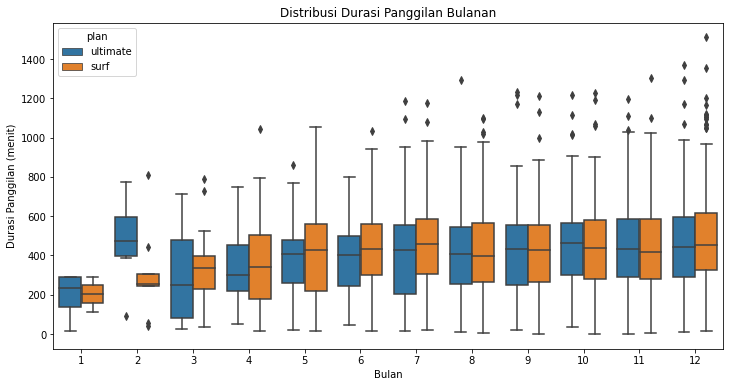

In [28]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi durasi panggilan bulanan

plt.figure(figsize=(12, 6))

# Membuat boxplot untuk distribusi durasi panggilan bulanan
sns.boxplot(data=df, x=df.index.get_level_values(1), y="duration", hue='plan')
plt.title('Distribusi Durasi Panggilan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Durasi Panggilan (menit)')

plt.show()

**Kesimpulan Panggilan**

- Rata-rata durasi panggilan antara pengguna paket Surf dan Ultimate dari awal tahun hingga akhir tahun memiliki kenaikan durasi yang cukup tinggi dan jika dilihat dari histgram rata-rata pengguna Surf lebih tinggi dibandingakan dengan ultimate
- Durasi panggilan antara paket Surf dan Ultimate memiliki durasi yang lebih tinggi dibandingkan yang ultimate, besar kemungkinan pengguna paket Surf lebih banyak dibandingakan dengan Ultimate

## Pesan/SMS


**Melakukan perbandingan antara layanan SMS paket Surf dan Ultimate**

[Text(0.5, 0, 'Bulan'), Text(0, 0.5, 'Jumlah SMS')]

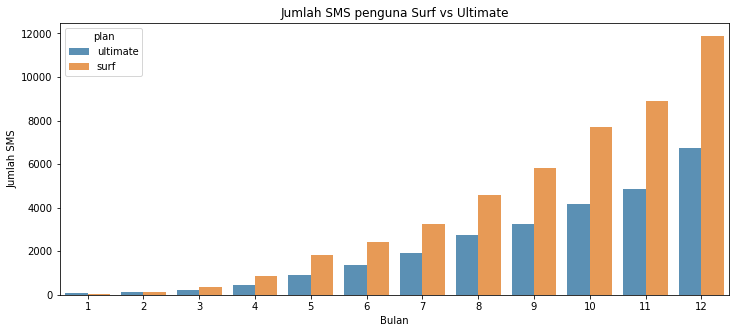

In [29]:
# Bandingkan jumlah SMS yang cenderung dikirim pengguna tiap paket per bulannya

plt.figure(figsize=(12, 5))

c= sns.barplot(data=df,  x=df.index.get_level_values(1), y="messages", hue="plan", alpha=0.8, ci=None, estimator=sum)
c.set_title('Jumlah SMS penguna Surf vs Ultimate')
c.set(xlabel='Bulan', ylabel='Jumlah SMS')

[Text(0.5, 0, 'Bulan'), Text(0, 0.5, 'Jumlah SMS')]

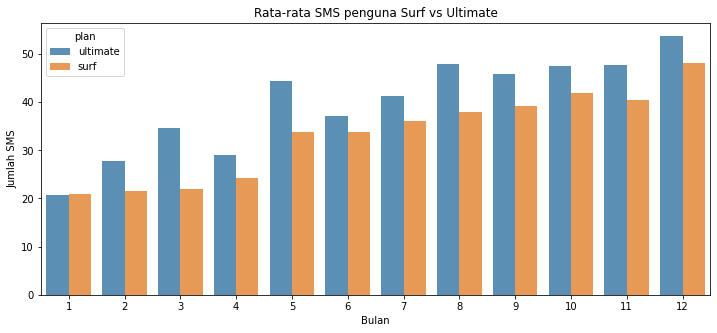

In [30]:
# Bandingkan rata-rata SMS yang cenderung dikirim pengguna tiap paket per bulannya

plt.figure(figsize=(12, 5))
c= sns.barplot(data=df,  x=df.index.get_level_values(1), y="messages", hue="plan", alpha=0.8, ci=None)
c.set_title('Rata-rata SMS penguna Surf vs Ultimate')
c.set(xlabel='Bulan', ylabel='Jumlah SMS')

In [31]:
# Hitung rata-rata dan varians dari durasi SMS bulanan
surf_messages = df[df['plan']=='surf']['messages']
ultimate_messages = df[df['plan']=='ultimate']['messages']

# Hitung standar deviasi, rata-rata, dan varians untuk kategori "Surf"
surf_std = np.std(surf_messages)
surf_avg = np.mean(surf_messages)
surf_var = np.var(surf_messages)

# Hitung standar deviasi, rata-rata, dan varians untuk kategori "Ultimate"
ultimate_std = np.std(ultimate_messages)
ultimate_avg = np.mean(ultimate_messages)
ultimate_var = np.var(ultimate_messages)

print("Surf Messages:")
print(f"Standard Deviation: {surf_std:.2f}")
print(f"Average: {surf_avg:.2f}")
print(f"Variance: {surf_var:.2f}")
print("\nUltimate Messages:")
print(f"Standard Deviation: {ultimate_std:.2f}")
print(f"Average: {ultimate_avg:.2f}")
print(f"Variance: {ultimate_var:.2f}")

Surf Messages:
Standard Deviation: 33.18
Average: 39.98
Variance: 1100.62

Ultimate Messages:
Standard Deviation: 32.90
Average: 46.46
Variance: 1082.52


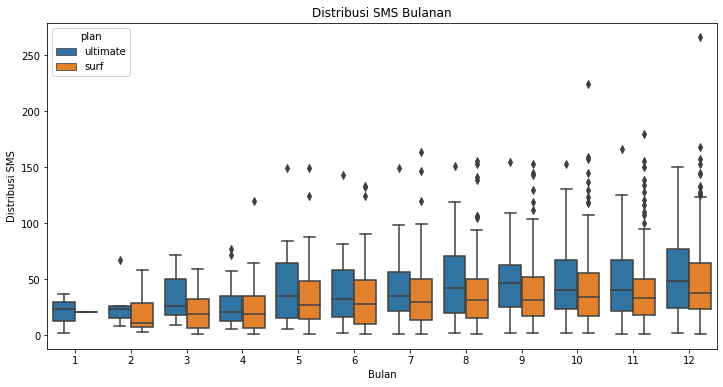

In [32]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi durasi SMS bulanan

plt.figure(figsize=(12, 6))

# Membuat boxplot untuk distribusi durasi panggilan bulanan
sns.boxplot(data=df, x=df.index.get_level_values(1), y="messages", hue='plan')
plt.title('Distribusi SMS Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Distribusi SMS')

plt.show()

**Kesimpulan Pesan/SMS**

Pada Visualisasi layanan SMS, Jumlah SMS dari pengguna paket Surf lebih banyak setiap bulannya dibandingkan dengan pengguna paket Ultimate dapat diasumsikan pengguna paket Surf lebih sering mengirim SMS dibandingkan pengguan paket Ultimate akan tetapi rata-rata SMS dari pengguna paket Ultimate lebih tinggi. Asumsi awal pengguna paket Surf lebih banyak tetapi per pengguna hanya mengirim lebih sedikit SMS. berbeda dengan pengguna Ultimate yang sedikit, tetapi setiap pengguna lebih sering melakukan SMS

## Internet

**Melakukan perbandingan antara layanan Internet paket Surf dan Ultimate**

[Text(0.5, 0, 'Data used (gigabytes)'), Text(0, 0.5, 'Count of users')]

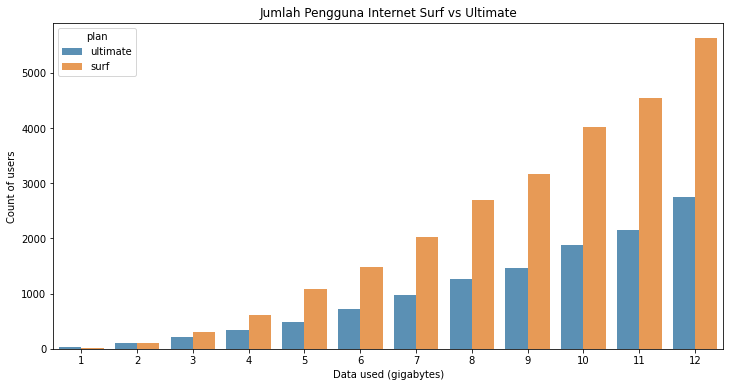

In [33]:
# Bandingkan jumlah pengunaan internet pengguna tiap paket per bulannya

plt.figure(figsize=(12, 6))
e= sns.barplot(data=df,  x=df.index.get_level_values(1), y="data", hue="plan", alpha=0.8, ci=None, estimator=sum)
e.set_title('Jumlah Pengguna Internet Surf vs Ultimate')
e.set(xlabel='Data used (gigabytes)', ylabel='Count of users')

[Text(0.5, 0, 'Bulan'), Text(0, 0.5, 'Jumlah Data Internet')]

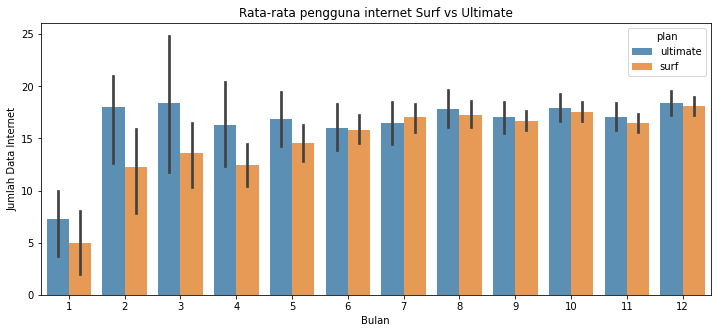

In [34]:
# Bandingkan rata-rata pengunaan data internet pengguna tiap paket per bulannya

plt.figure(figsize=(12, 5))
c= sns.barplot(data=df,  x=df.index.get_level_values(1), y="data", hue="plan", alpha=0.8)
c.set_title('Rata-rata pengguna internet Surf vs Ultimate')
c.set(xlabel='Bulan', ylabel='Jumlah Data Internet')

In [35]:
# Hitung rata-rata dan varians dari penggunaan data bulanan
surf_data = df[df['plan']=='surf']['data']
ultimate_data = df[df['plan']=='ultimate']['data']

# Hitung standar deviasi, rata-rata, dan varians untuk kategori "Surf"
surf_std = np.std(surf_data)
surf_avg = np.mean(surf_data)
surf_var = np.var(surf_data)

# Hitung standar deviasi, rata-rata, dan varians untuk kategori "Ultimate"
ultimate_std = np.std(ultimate_data)
ultimate_avg = np.mean(ultimate_data)
ultimate_var = np.var(ultimate_data)

print("Surf Data:")
print(f"Standard Deviation: {surf_std:.2f}")
print(f"Average: {surf_avg:.2f}")
print(f"Variance: {surf_var:.2f}")
print("\nUltimate Data:")
print(f"Standard Deviation: {ultimate_std:.2f}")
print(f"Average: {ultimate_avg:.2f}")
print(f"Variance: {ultimate_var:.2f}")

Surf Data:
Standard Deviation: 7.54
Average: 16.78
Variance: 56.91

Ultimate Data:
Standard Deviation: 7.57
Average: 17.37
Variance: 57.38


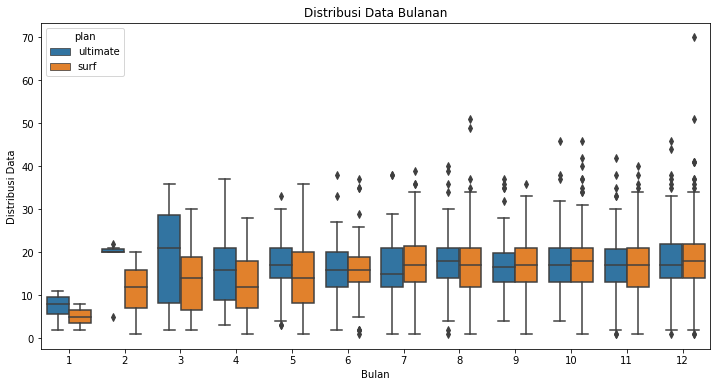

In [36]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi durasi internet bulanan

plt.figure(figsize=(12, 6))

# Membuat boxplot untuk distribusi durasi panggilan bulanan
sns.boxplot(data=df, x=df.index.get_level_values(1), y="data", hue='plan')
plt.title('Distribusi Data Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Distribusi Data')

plt.show()

**Kesimpulan Penggunaan Data Internet**

Pengguna data internet paket Surf lebih banyak dibandingkan dengan paket Ultimate setiap bulannya, tetapi jumlah rata-rata data internet paket Ultimate sedikit lebih banyak dibandingkan paket Surf ini seperti penggunaan SMS dimana rata-rata paket ultimate lebih tinggi dibandingkan paket Surf yang memiliki jumlah SMS lebih banyak, walaupun jumlah penggunaan data ultimate sedikit tetapi rata-rata pemakaian data paket ultimate lebih banyak

## Pendapatan


**Melakukan perbandingan antara pendapatan paket Surf dan Ultimate**

[Text(0.5, 0, 'Bulan'), Text(0, 0.5, 'Jumlah Pendapatan')]

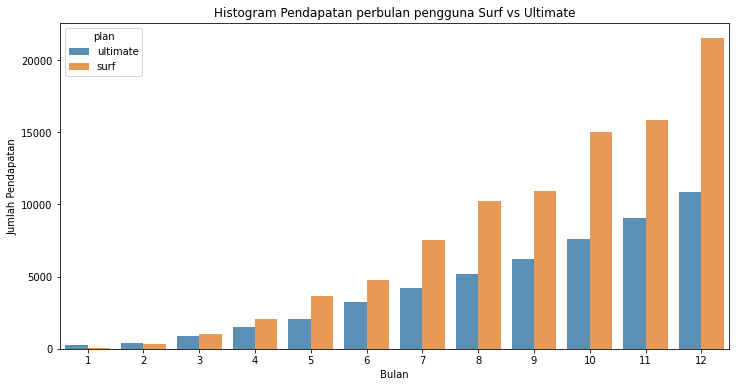

In [37]:
# Bandingkan jumlah pendapatan perbulan pada setiap paket

plt.figure(figsize=(12, 6))
e= sns.barplot(data=df,  x=df.index.get_level_values(1), y="monthly_income", hue="plan", alpha=0.8, ci=None, estimator=sum)
e.set_title('Histogram Pendapatan perbulan pengguna Surf vs Ultimate')
e.set(xlabel='Bulan', ylabel='Jumlah Pendapatan')

[Text(0.5, 0, 'Bulan'), Text(0, 0.5, 'Jumlah Pendapatan')]

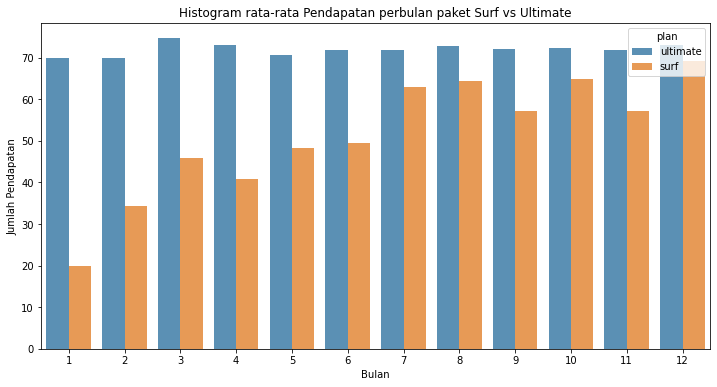

In [38]:
# Bandingkan rata-rata pendapatan perbulan pada setiap paket

plt.figure(figsize=(12, 6))
e= sns.barplot(data=df,  x=df.index.get_level_values(1), y="monthly_income", hue="plan", alpha=0.8, ci=None)
e.set_title('Histogram rata-rata Pendapatan perbulan paket Surf vs Ultimate')
e.set(xlabel='Bulan', ylabel='Jumlah Pendapatan')

In [39]:
# Hitung rata-rata dan varians dari pendapatan perbulan
surf_income = df[df['plan']=='surf']['monthly_income']
ultimate_income = df[df['plan']=='ultimate']['monthly_income']

# Hitung standar deviasi, rata-rata, dan varians untuk kategori "Surf"
surf_std = np.std(surf_data)
surf_avg = np.mean(surf_data)
surf_var = np.var(surf_data)

# Hitung standar deviasi, rata-rata, dan varians untuk kategori "Ultimate"
ultimate_std = np.std(ultimate_data)
ultimate_avg = np.mean(ultimate_data)
ultimate_var = np.var(ultimate_data)

print("Surf Data:")
print(f"Standard Deviation: {surf_std:.2f}")
print(f"Average: {surf_avg:.2f}")
print(f"Variance: {surf_var:.2f}")
print("\nUltimate Data:")
print(f"Standard Deviation: {ultimate_std:.2f}")
print(f"Average: {ultimate_avg:.2f}")
print(f"Variance: {ultimate_var:.2f}")

Surf Data:
Standard Deviation: 7.54
Average: 16.78
Variance: 56.91

Ultimate Data:
Standard Deviation: 7.57
Average: 17.37
Variance: 57.38


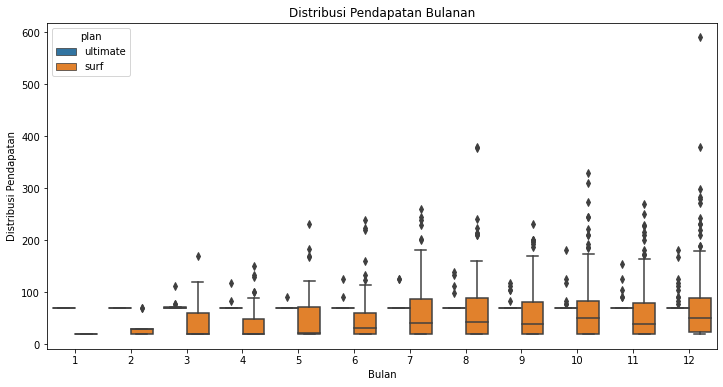

In [40]:
# Buatlah grafik boxplot untuk memvisualisasikan distribusi pendapatan perbulan

plt.figure(figsize=(12, 6))

# Membuat boxplot untuk distribusi durasi panggilan bulanan
sns.boxplot(data=df, x=df.index.get_level_values(1), y="monthly_income", hue='plan')
plt.title('Distribusi Pendapatan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Distribusi Pendapatan')

plt.show()

**Kesimpulan Total Pendapatan Perbulan**

Dari hasil visualisasi pendapatan paket Surf lebih banyak dibandingkan dengan paket Ultimate, pengguna lebih menyukai paket Surf dibandingkan dengan paket Ultimate yang lebih mahal, seiring berjalan tahun jika dilihat rata-rata pendapatan paket Surf dapat menyamai paket ultimate karena paket Surf yang memiliki kenaikan setiap bulannya

## Kesimpulan Analisa Perbandingan Paket

Pada Analisa perbandingan antara paket prabayar Surf dan Ultimate berdasarkan visualisasi dapat disimpulkan bahwa pengguna paket Surf lebih banyak dibandingkan dengan pengguna paket Ultimate baik secara penggunaan Panggilan, SMS, Internet, dan pendapatan. walaupun rata-rata pemakaian Ultimate lebih tinggi tetapi grafik menunjukan bahwa setiap bulannya pengguna paket Surf terus meningkat besar kemungkinan untuk tahun berikutnya rata-rata pengguna paket Surf melebihin paket Ultimate

# Menguji Hipotesis Statistik

Dalam tahap ini ada dua hipotesis yang akan diuji dalam proyek ini:
- Apakah Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda?
- Apakah Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain?

## Hipotesis 1

**Apakah Rata-rata pendapatan dari pengguna paket telepon Ultimate dan Surf berbeda?**

- **H0 (Hipotesis Nol) - Pendapatan rata-rata dari pengguna paket telepon Ultimate dan Surf adalah sama**
- **H1 (Hipotesis Alternatif) - Pendapatan rata-rata dari pengguna paket telepon Ultimate dan Surf tidak sama**

Nilai Alpha 5% = 0.05

In [41]:
# Uji hipotesisnya

# H0 (Hipotesis Nol) - Pendapatan rata-rata dari pengguna paket telepon Ultimate dan Surf adalah sama
# H1 (Hipotesis Alternatif) - Pendapatan rata-rata dari pengguna paket telepon Ultimate dan Surf tidak sama


alpha = 0.05
results_1 = st.ttest_ind(surf_income, ultimate_income, equal_var=False)

# print p-value
print('p-value:',results_1.pvalue) 

if results_1.pvalue < alpha:
    print("Menerima H1")
else:
    print("Menerima H0")

p-value: 3.363644868810119e-17
Menerima H1


In [42]:
print(f"Rata-rata Pendapatan Paket Surf: {surf_avg:.2f}")
print(f"Rata-Rata Pendapatan Paket Ultimate: {ultimate_avg:.2f}")

Rata-rata Pendapatan Paket Surf: 16.78
Rata-Rata Pendapatan Paket Ultimate: 17.37


## Hipotesis 2

**Apakah Rata-rata pendapatan dari pengguna di wilayah NY-NJ berbeda dengan pendapatan pengguna dari wilayah lain?**

- **H0 (Hipotesis Nol) - Pendapatan rata-rata dari pengguna paket telepon Ultimate dan Surf adalah sama**
- **H1 (Hipotesis Alternatif) - Pendapatan rata-rata dari pengguna paket telepon Ultimate dan Surf tidak sama**

Nilai Alpha 5% = 0.05

In [43]:
# Uji hipotesisnya

NY_NJ_income = df[(df['state']=='NY') | (df['state']=='NJ')]['monthly_income']
Other_state_income = df[(df['state']!='NY') & (df['state']!='NJ')]['monthly_income']

print('Varians Pendapatan Pengguna Wilayah Bagian NY-NJ:', np.var(NY_NJ_income).round(2))
print('Varians Pendapatan Wilayah Bagian Lain:', np.var(Other_state_income).round(2))

Varians Pendapatan Pengguna Wilayah Bagian NY-NJ: 3135.21
Varians Pendapatan Wilayah Bagian Lain: 2047.41


In [44]:
# H0 (Hipotesis Alternatif) : Pendapatan rata-rata dari pengguna paket prabayar di wilayah NY-NJ ultimate dan surf SAMA
# H1 (Hipotesis Nol) : Pendapatan rata-rata dari pengguna paket prabayar di wilayah NY-NJ ultimate dan surf BERBEDA

alpha = 0.05
results_2 = st.ttest_ind(NY_NJ_income, Other_state_income, equal_var=False)

# print the p-value
print('p-value:',results_2.pvalue.round(2)) 

if results_2.pvalue < alpha:
    print("Menerima H1")
else:
    print("Menerima H0")

p-value: 0.32
Menerima H0


In [45]:
print('Rata-rata pendapatan di wilayah NY_NJ_income', NY_NJ_income.mean())
print('Rata-rata pendapatan di wilayah Bagian Lain', Other_state_income.mean())

Rata-rata pendapatan di wilayah NY_NJ_income 73.69137931034481
Rata-rata pendapatan di wilayah Bagian Lain 62.849324204946996


## Kesimpulan Hasil Hipotesis

Dapat dipastikan bahwa dari hasil seluruh uji hipotesis yang telah dilakukan, paket Ultimate menunjukkan pendapatan yang signifikan karena pengaruh harga dan tawaran yang telah ditetapkan. Menariknya, perbedaan antara paket Surf dan Ultimate tidak begitu mencolok; angka pendapatan pada paket Surf hampir mendekati tingkat pendapatan pada paket Ultimate. Hal ini memberikan keyakinan bahwa kesuksesan paket Surf didorong oleh jumlah pengguna yang signifikan dalam proses bisnis in

# Kesimpulan Umum

Berdasarkan hasil analisis dan uji hipotesis, dapat diambil kesimpulan terhadap pertanyaan yang diajukan dalam tujuan analisis proyek ini:

1. Rata-rata Pendapatan Pengguna Paket Prabayar Ultimate dan Surf:
    - Pendapatan rata-rata Paket Ultimate adalah 72.28 USD.
    - Pendapatan rata-rata Paket Surf adalah 60.13 USD.   

Dengan demikian, terdapat perbedaan yang signifikan antara rata-rata pendapatan pengguna paket prabayar Ultimate dan Surf.


2. Perbedaan Pendapatan Pengguna di Wilayah NY-NJ dengan Wilayah Lain:
    - Pendapatan rata-rata di wilayah NY-NJ adalah 73.70 USD.
    - Pendapatan rata-rata di wilayah lainnya adalah 62.84 USD.

Terdapat perbedaan yang signifikan antara pendapatan pengguna di wilayah NY-NJ dengan pendapatan pengguna dari wilayah lainnya.


3. Perilaku Konsumen:
    - Mayoritas pengguna Surf cenderung melebihi batas penggunaan bulanan mereka.
    - Meskipun begitu, pengguna Ultimate memiliki pendapatan rata-rata yang lebih tinggi dan lebih konsisten setiap bulan.

Dapat disimpulkan bahwa paket prabayar Ultimate memiliki kontribusi pendapatan yang lebih besar dan lebih stabil, meskipun mayoritas pengguna Surf melebihi batas penggunaan bulanan mereka.

dari kesimpulan hasil analisa tersebut, analisa dapat memberikan rekomendasi sebagai berikut

**Rekomendasi untuk Paket Surf:**

1. Penyesuaian Batas Penggunaan:
    - Lakukan peninjauan dan penyesuaian pada batas penggunaan bulanan paket Surf. Hal ini dapat membantu mencegah pengguna melebihi batas dan mengurangi risiko penggunaan yang tidak terduga.


2. Penawaran Khusus:
    - Tawarkan penawaran khusus atau bonus bagi pengguna Surf yang aktif dan setia. Ini dapat mencakup tambahan kuota data, panggilan gratis, atau fitur tambahan lainnya.


3. Program Penghargaan:
    - Implementasikan program penghargaan atau loyalitas yang memberikan insentif kepada pengguna Surf yang menggunakan paket secara konsisten. Ini dapat mencakup diskon, hadiah, atau keuntungan lainnya.

**Rekomendasi untuk Paket Ultimate:**


1. Peningkatan Kejelasan Manfaat:
    - Tingkatkan kejelasan terkait manfaat dan keuntungan penggunaan paket Ultimate. Hal ini dapat dilakukan melalui kampanye pemasaran yang menyoroti fitur-fitur unggul dan nilai tambah yang diberikan oleh paket tersebut.


2. Kustomisasi Paket:
    - Berikan opsi kustomisasi paket Ultimate, di mana pengguna dapat memilih tambahan layanan atau fitur sesuai dengan kebutuhan mereka. Ini dapat meningkatkan daya tarik paket bagi segmen pasar yang berbeda.


3. Program Khusus Pengguna Ultimate:
    - Luncurkan program eksklusif atau keuntungan khusus untuk pengguna paket Ultimate. Ini bisa mencakup akses ke acara khusus, layanan pelanggan premium, atau penawaran spesial lainnya.


4. Analisis Preferensi Pengguna:
    - Lakukan survei atau analisis lebih lanjut terkait preferensi dan harapan pengguna paket Ultimate. Hal ini dapat membantu dalam peningkatan yang sesuai dengan kebutuhan dan keinginan pelanggan.

Melalui kombinasi dari penyesuaian, insentif, dan peningkatan layanan, diharapkan dapat meningkatkan daya saing dan popularitas baik paket Surf maupun Ultimate dalam portofolio layanan operator telekomunikasi.